In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from scipy.integrate import solve_ivp

In [40]:
L = 4
x_span = np.linspace(-L, L, 81)
N = len(x_span)
dx = x_span[1] - x_span[0]

A = np.zeros((N-2, N-2))

for j in range(N-2):
    A[j, j] = -2 - (dx**2) * x_span[j + 1]**2
    if j < N - 3 :
        A[j + 1, j] = 1
        A[j, j + 1] = 1

In [41]:
def boundary_conditions(A):
    A[0, 0] += 4 / 3
    A[0, 1] += - 1 / 3
    A[-1, -1] += + 4 / 3
    A[-1, -2] += - 1 / 3

    return A

In [42]:
def eigen_calc(A):
    eigvals, eigvecs = eigs(-A, k=5, which='SM')

    return eigvals, eigvecs

[[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645543e-02 1.25018106e-01 2.59248830e-01
  4.24643293e-01]
 [1.49018556e-02 5.88460055e-02 1.541287

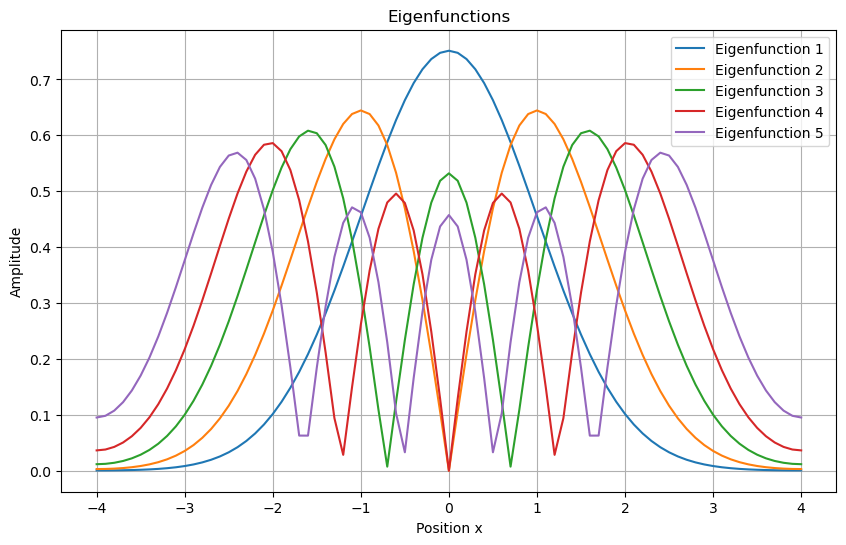

In [43]:
A = boundary_conditions(A)

D, V = eigen_calc(A)

V2 = np.vstack([4/3 * V[0,:] - 1/3 * V[1, :], V, 4/3 * V[-1, :] - 1/3 * V[-2, :]])

eigenvecs = np.zeros((N, 5))
eigenvals = np.zeros(5)

for j in range (5):
    norm = np.sqrt(np.trapz(V2[:, j]**2, x))
    eigenvecs[:, j] = np.abs(V2[:, j] / norm)

eigenvals = np.sort(D[:5] / dx**2)

A3 = eigenvecs.real
A4 = eigenvals.real

np.save("A3.npy", A3)
np.save("A4.npy", A4)
print(A3,"\n")
print(A4,"\n")

In [ ]:
# plot part (b)

plt.figure(figsize=(10, 6))
for j in range(5):
    plt.plot(x, A3[:, j], label=f'Eigenfunction {j+1}')
plt.xlabel('Position x')
plt.ylabel('Amplitude')
plt.title('Eigenfunctions')
plt.legend()
plt.grid(True)
plt.show()